In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# 1. Persiapkan Path Dataset


In [ ]:
data_dir = '../../../dataset/archive/Original Images/Original Images/'


# 2. Image Data Generator untuk Preprocessing

In [43]:
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalisasi gambar
    validation_split=0.2  # Split data menjadi 80% training, 20% validation
)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),   # Sesuaikan ukuran input
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 2050 images belonging to 1 classes.
Found 512 images belonging to 1 classes.


# 3. Membangun Model ANN

In [44]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),          # Mengubah input gambar ke vektor 1D
    Dense(128, activation='relu'),             # Layer pertama dengan 128 neuron
    Dropout(0.5),                              # Dropout untuk mencegah overfitting
    Dense(64, activation='relu'),              # Layer kedua dengan 64 neuron
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Compile Model


In [45]:
model.compile(
    optimizer=Adam(learning_rate=0.001),       # Adam optimizer
    loss='categorical_crossentropy',           # Loss untuk klasifikasi multi kelas
    metrics=['accuracy']
)

# 5. Training Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,                                 # Jumlah epoch
    validation_data=val_generator,
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can inc

65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 759ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10


2024-11-06 07:26:43.511836: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:169: Filling up shuffle buffer (this may take a while): 4 of 8


 1/65 ━━━━━━━━━━━━━━━━━━━━ 29:08 27s/step - accuracy: 1.0000 - loss: 0.0000e+00

2024-11-06 07:26:58.034548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


65/65 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 977ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
 4/65 ━━━━━━━━━━━━━━━━━━━━ 55s 902ms/step - accuracy: 1.0000 - loss: 0.0000e+00

# 6. Evaluasi Model

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy}")
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy}")

# Confusion Matrix dan Classification Report
y_pred = np.argmax(model.predict(val_generator), axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Classification Report")
print(classification_report(y_true, y_pred, labels=np.unique(y_true), target_names=class_labels))

print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1429 - loss: 1.8889
Validation accuracy: 0.1428571492433548
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - accuracy: 0.1429 - loss: 1.8889
Validation accuracy: 0.1428571492433548
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report
               precision    recall  f1-score   support

malik_dataset       0.00      0.00      0.00         3
sadam_dataset       0.14      1.00      0.25         1
shafa_dataset       0.00      0.00      0.00         3

     accuracy                           0.14         7
    macro avg       0.05      0.33      0.08         7
 weighted avg       0.02      0.14      0.04         7

Confusion Matrix
[[0 3 0]
 [0 1 0]
 [0 3 0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2628: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/

# 7. Visualisasi Hasil Training

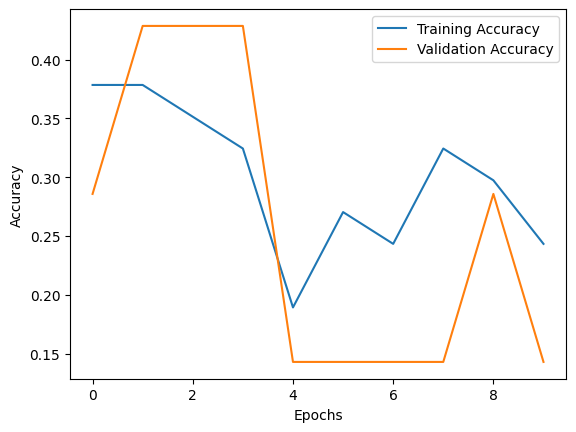

In [ ]:
# 7. Visualisasi Hasil Training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Simpan Model
model.save("face_recognition_ann_model.h5")